In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

# distribution plots

### distplot

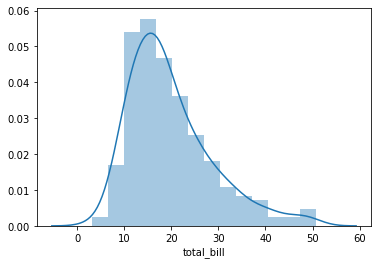

In [7]:
sns.distplot(tips['total_bill'])     

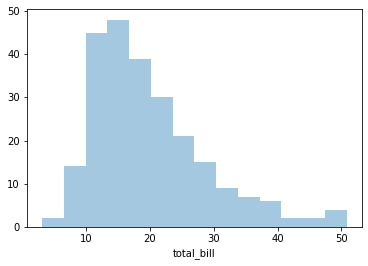

In [8]:
sns.distplot(tips['total_bill'],kde=False)   #kernal density estimation

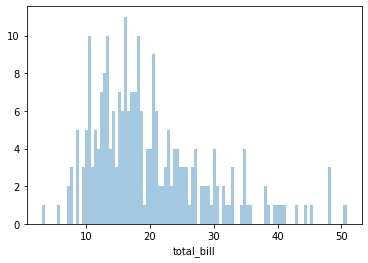

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=100)   

### joint plot

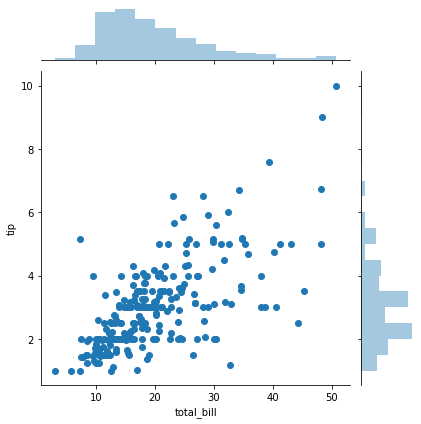

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips)

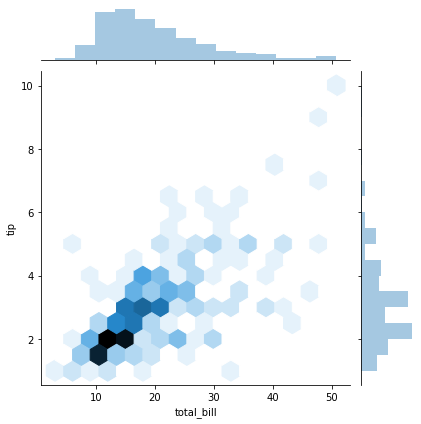

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

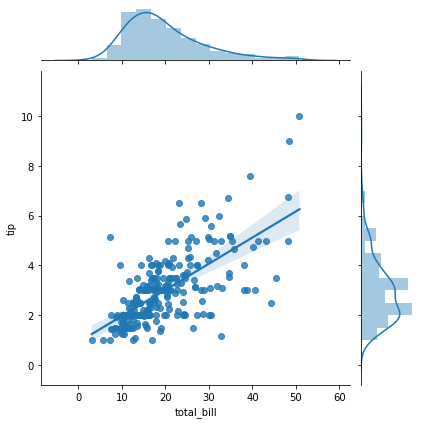

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

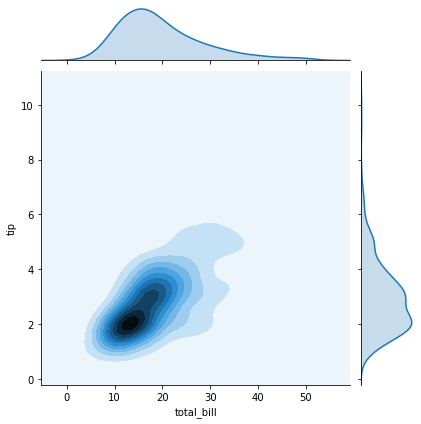

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

### pairplot

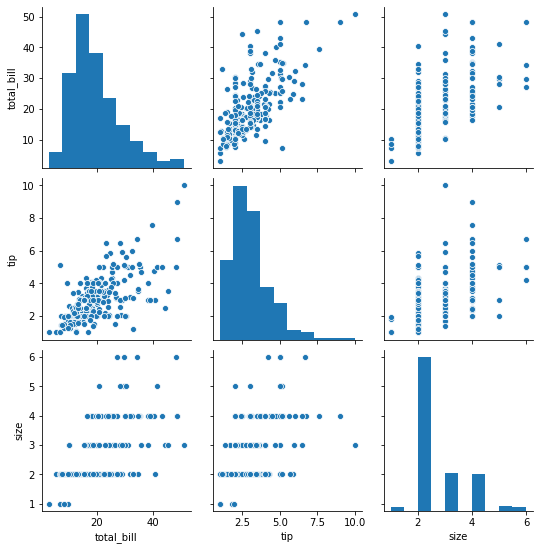

In [14]:
sns.pairplot(tips)

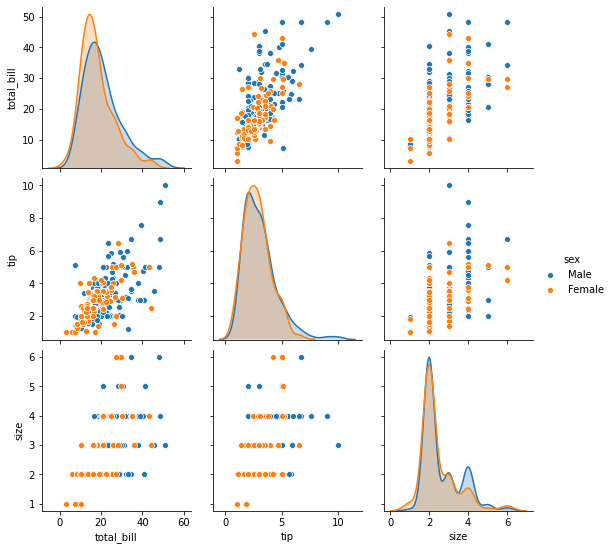

In [15]:
sns.pairplot(tips,hue='sex')

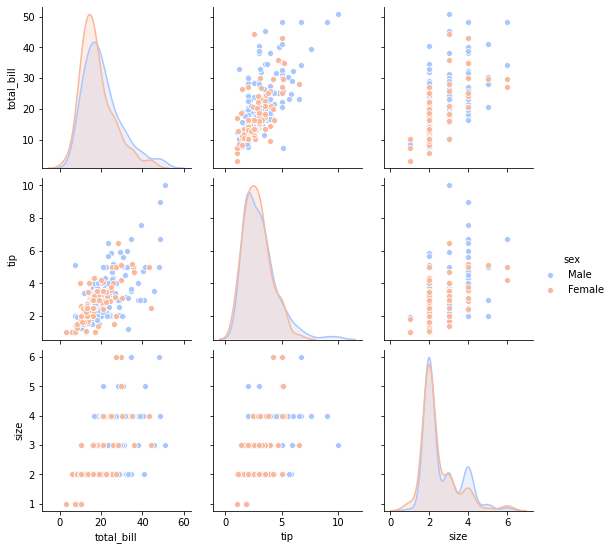

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### rugplot

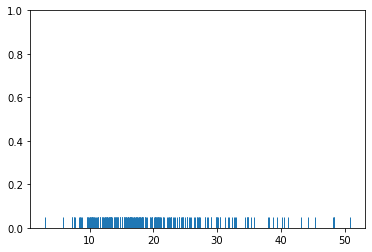

In [17]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

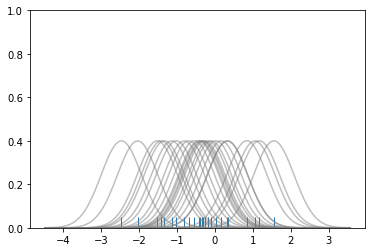

In [18]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

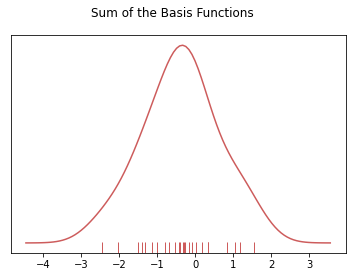

In [27]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

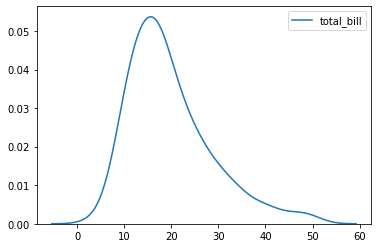

In [22]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

### barplot

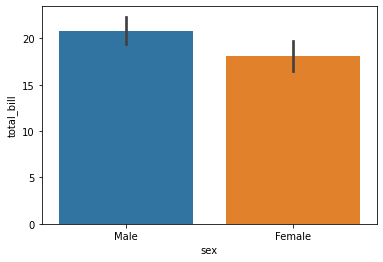

In [38]:
sns.barplot(x='sex',y='total_bill',data=tips)    

In [40]:
import numpy as np

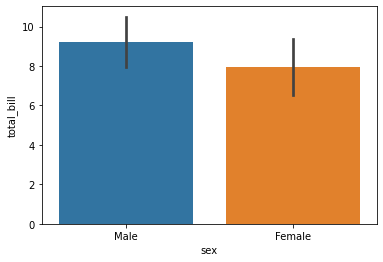

In [47]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

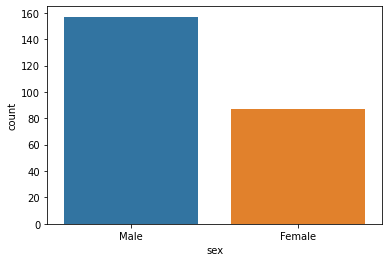

In [46]:
sns.countplot(x='sex',data=tips)

### box plot

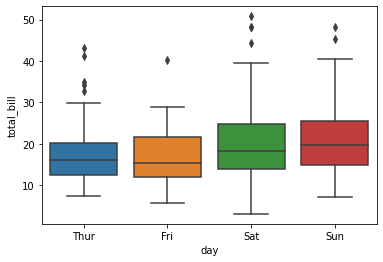

In [49]:
sns.boxplot(x='day',y='total_bill',data=tips)

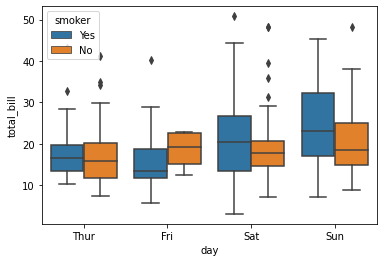

In [50]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

### violinplot

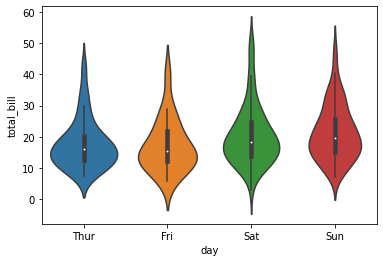

In [51]:
sns.violinplot(x='day',y='total_bill',data=tips)

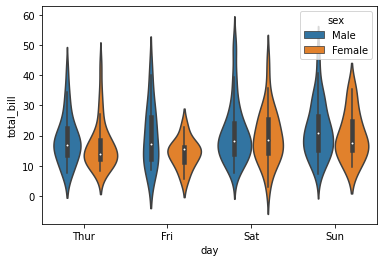

In [52]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

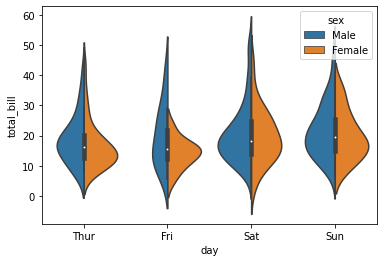

In [53]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

### strip plot

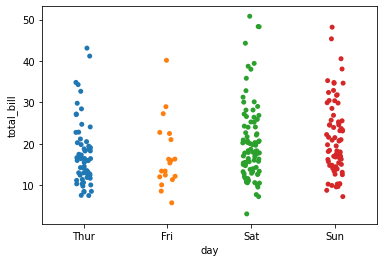

In [60]:
sns.stripplot(x='day',y='total_bill',data=tips)

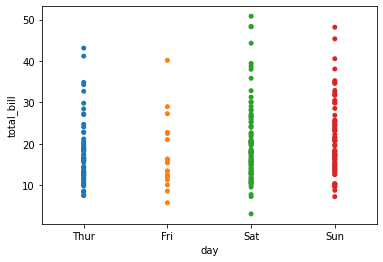

In [62]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=False)

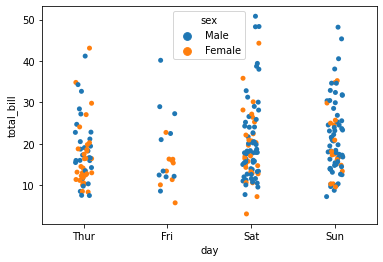

In [63]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\categorical.py:2781: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


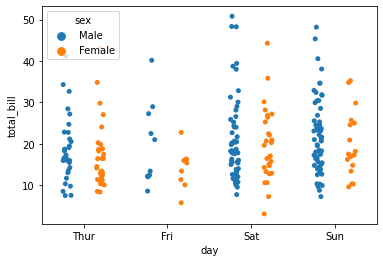

In [64]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',split='True')

### swarm plot

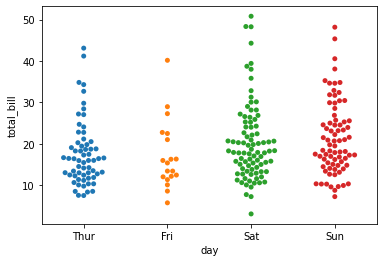

In [67]:
sns.swarmplot(x='day',y='total_bill',data=tips)

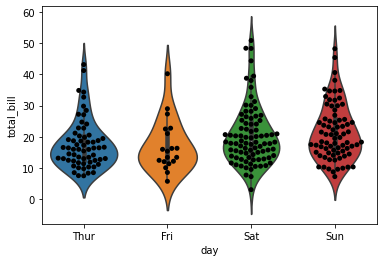

In [69]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

### factor plot   (catplot)

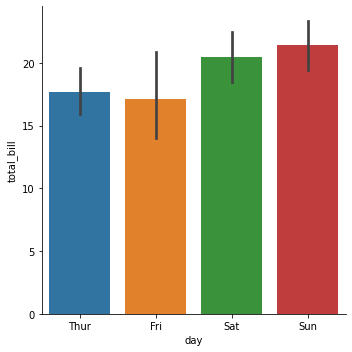

In [72]:
sns.catplot(x='day',y='total_bill',data=tips,kind='bar') 

# Matrix plots

In [77]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
tips.shape

(244, 7)

In [73]:
flights = sns.load_dataset('flights')

In [74]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [109]:
flights.shape

(144, 3)

### heat map

###### Matrix form : column and the index variable names actually indicates a relevancy to both the column and the index name vor the cell where they match up.

In [84]:
tc = tips.corr()

In [85]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


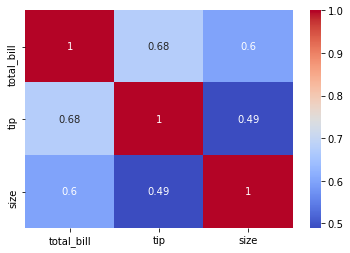

In [87]:
sns.heatmap(tc,annot =True,cmap='coolwarm')

In [88]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [95]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

In [96]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


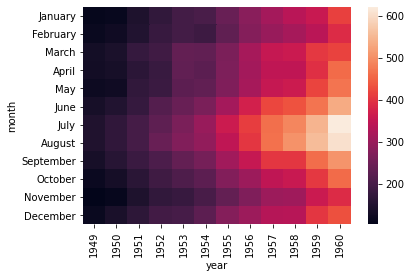

In [108]:
sns.heatmap(fp)

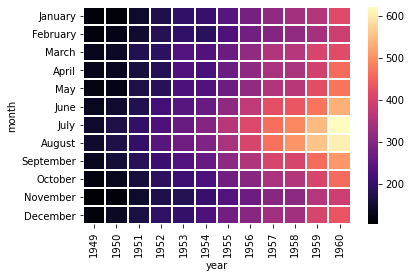

In [107]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth='1')

### cluster map

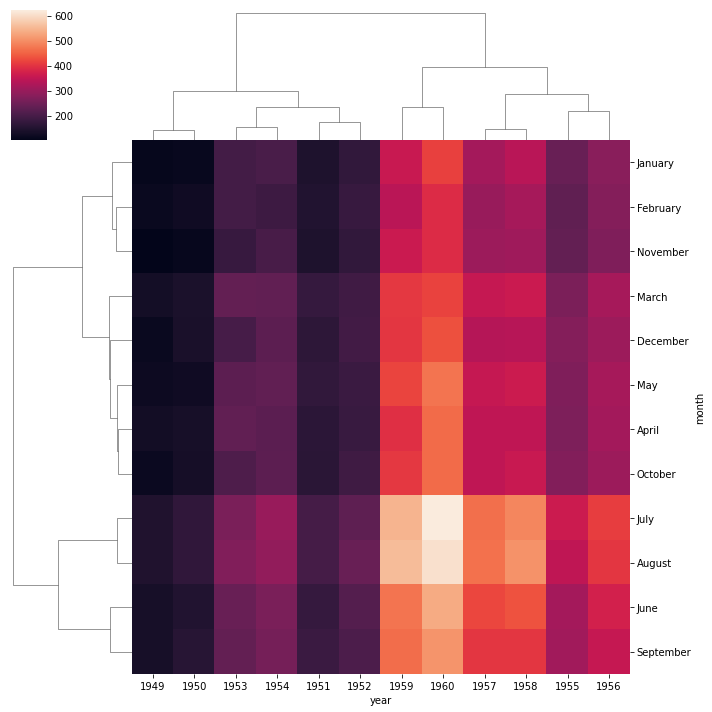

In [110]:
sns.clustermap(fp)

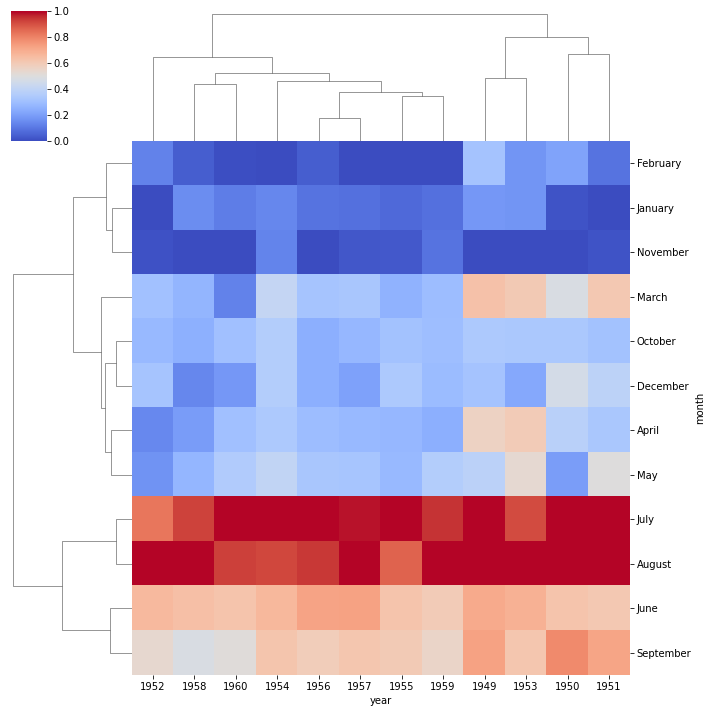

In [112]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

# Grids

In [113]:
iris = sns.load_dataset('iris')

In [117]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [118]:
iris.shape

(150, 5)

In [116]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### PairGrid 

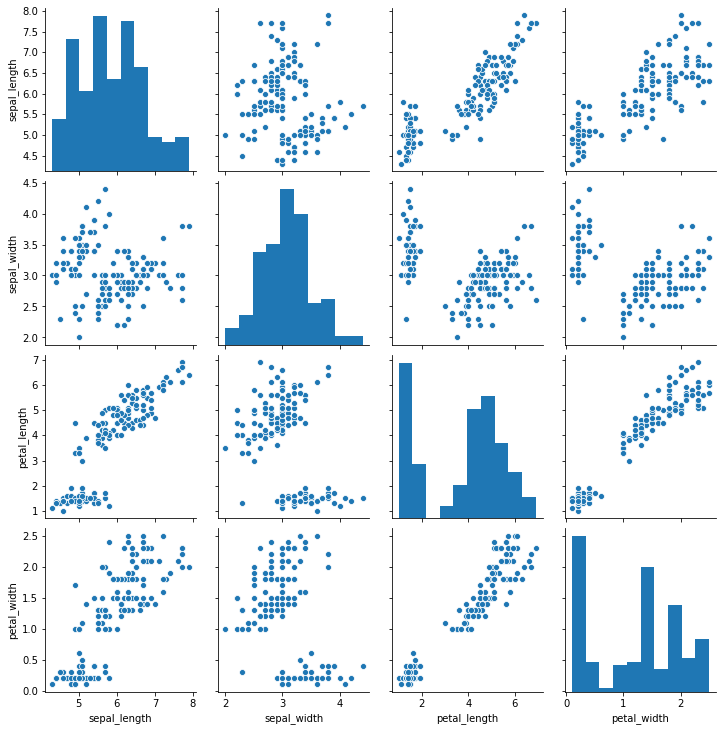

In [119]:
sns.pairplot(iris)

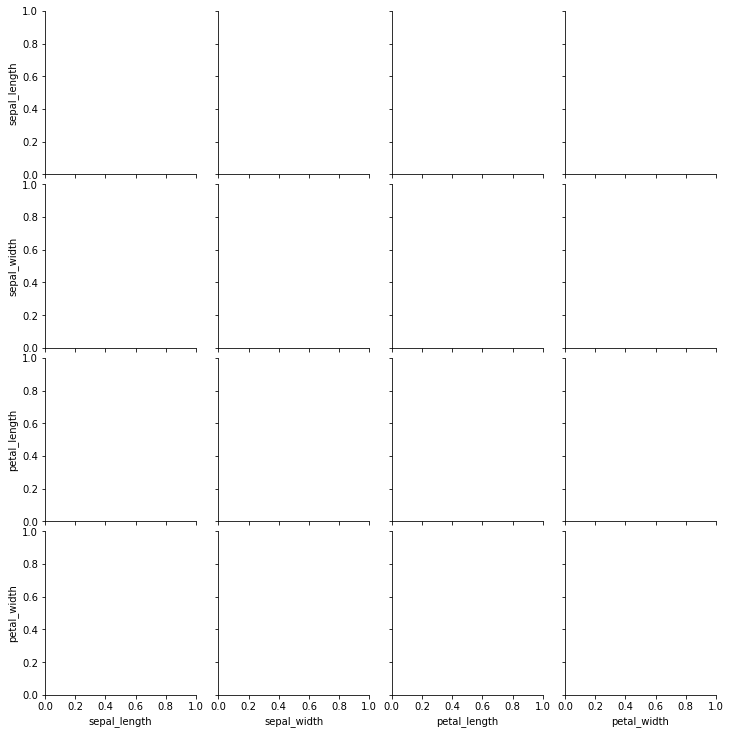

In [123]:
sns.PairGrid(iris)

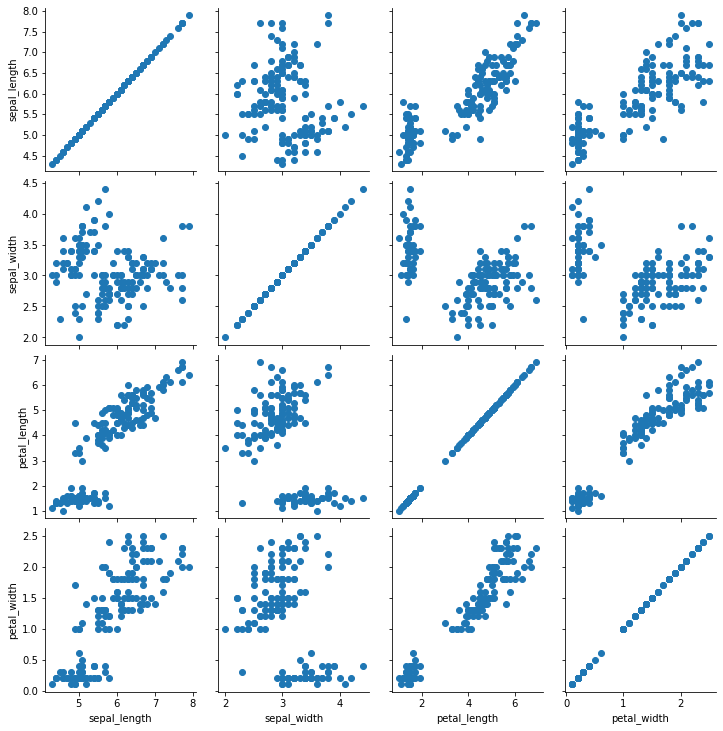

In [126]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

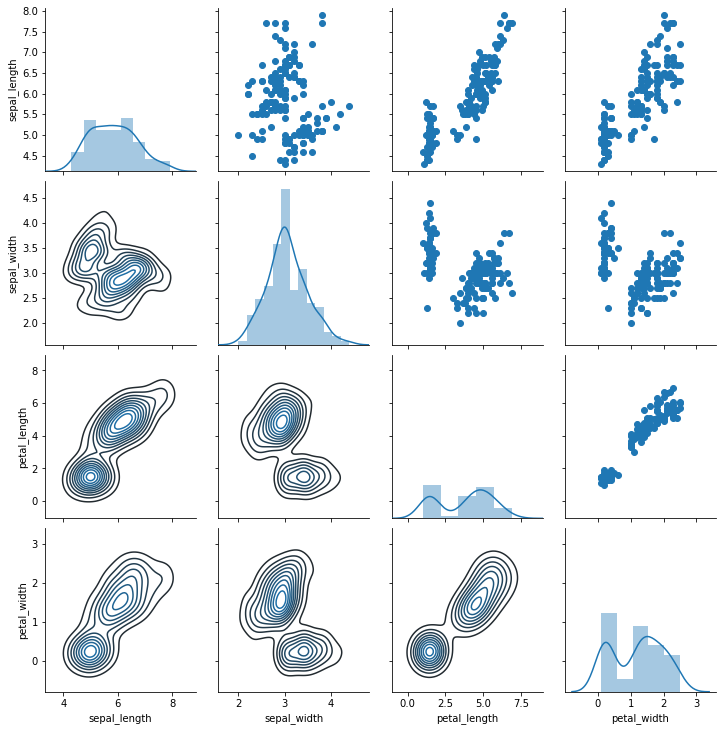

In [134]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### FacetGrid

In [131]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


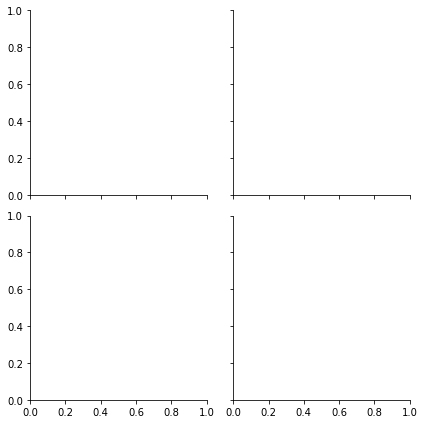

In [132]:
g = sns.FacetGrid(tips,col='time',row='smoker')

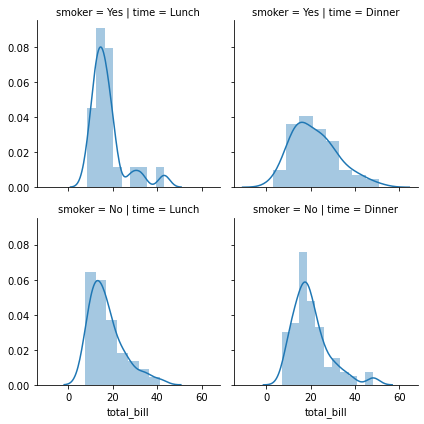

In [133]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

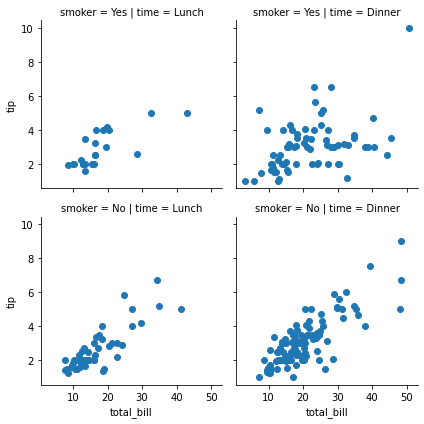

In [138]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

# Regression plots

In [139]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


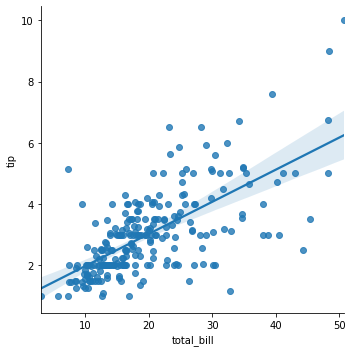

In [140]:
sns.lmplot(x='total_bill',y='tip',data=tips)

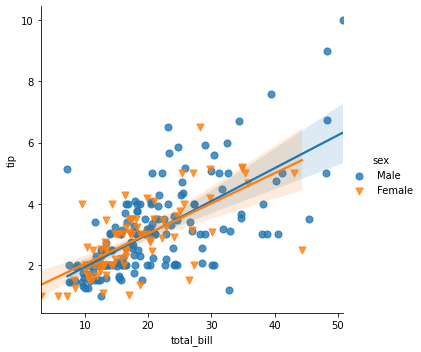

In [148]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':50})

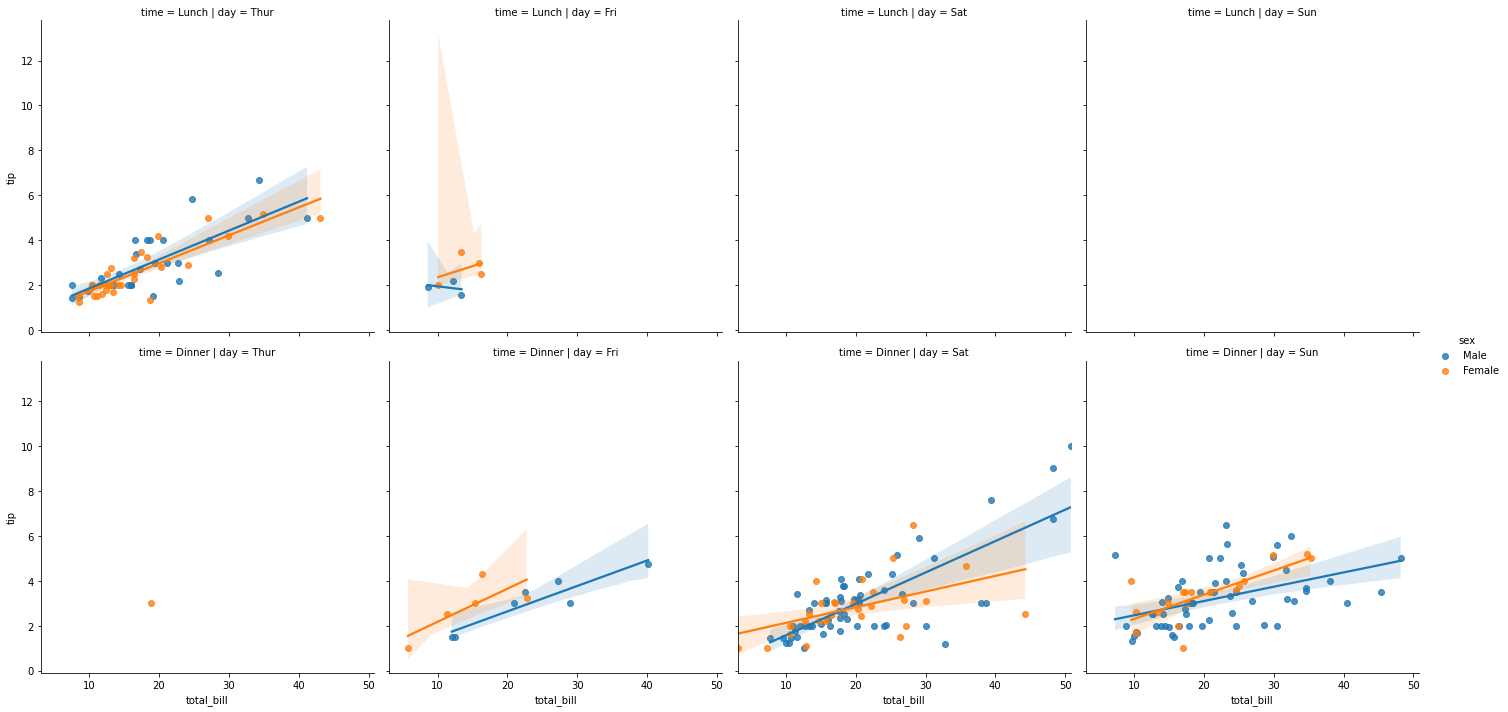

In [153]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex')

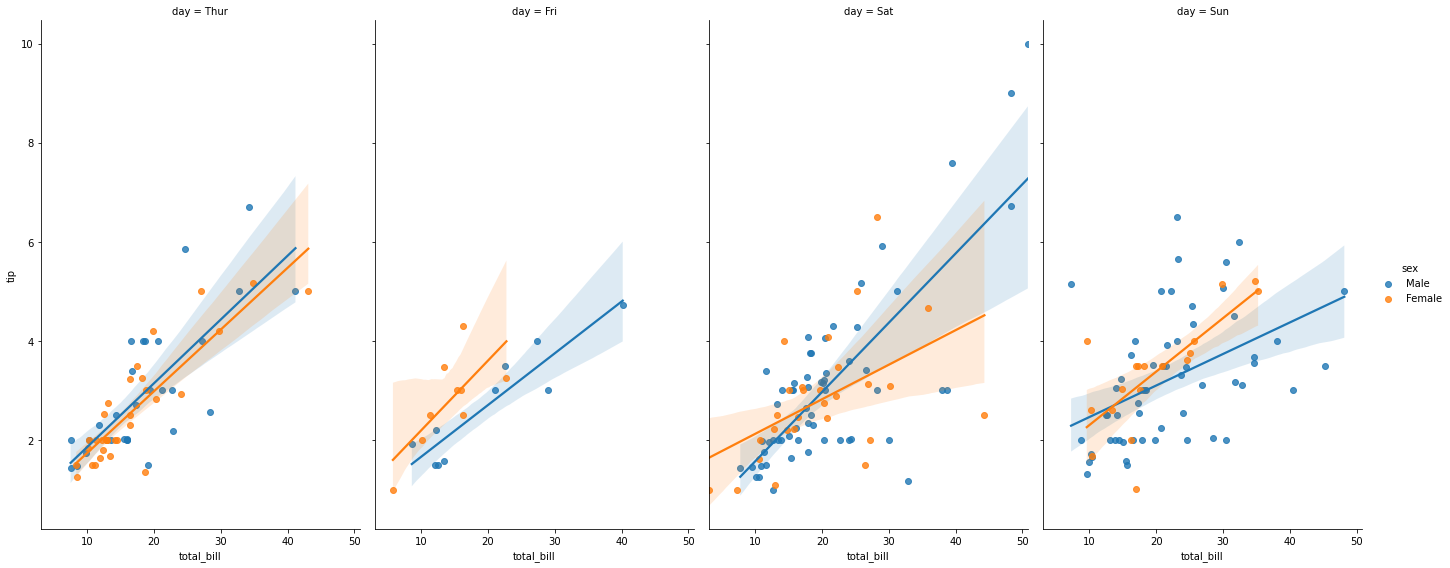

In [158]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,height=8)

## Style and color

In [159]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


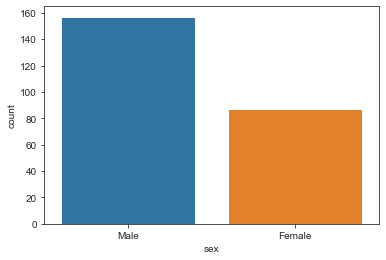

In [162]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)


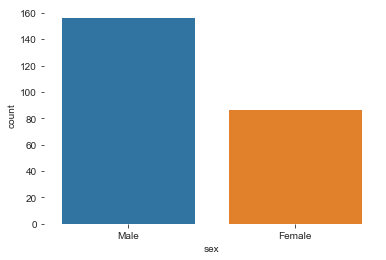

In [164]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

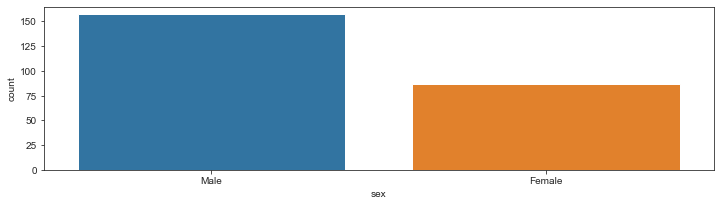

In [165]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

#### scale and context

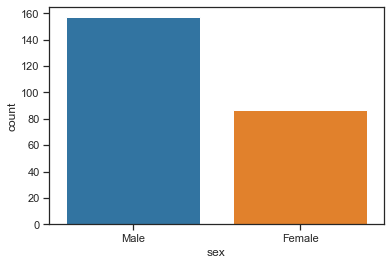

In [173]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

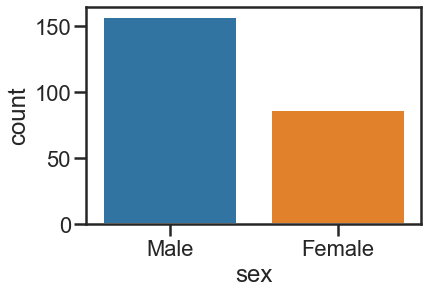

In [174]:
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

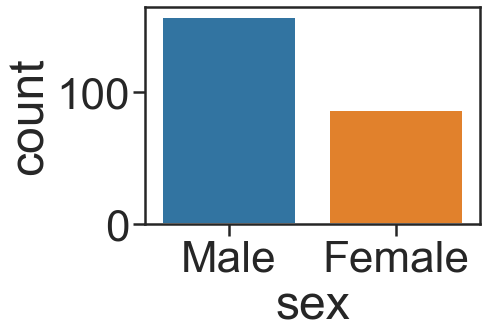

In [175]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)

#### palettes and colors

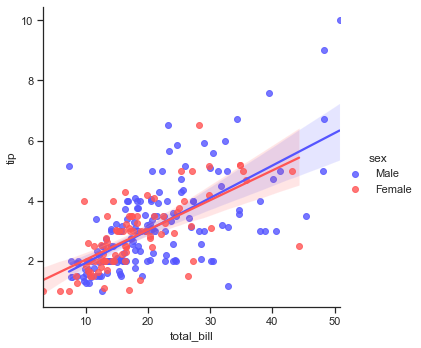

In [183]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')
sns.set_context(context=None,font_scale=1)


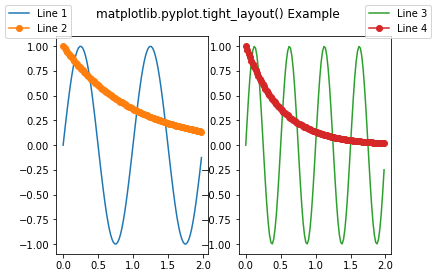

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

x = np.arange(0.0, 2.0, 0.02)
y1 = np.sin(2 * np.pi * x)
y2 = np.exp(-x)
l1, = axs[0].plot(x, y1)
l2, = axs[0].plot(x, y2, marker ='o')

y3 = np.sin(4 * np.pi * x)
y4 = np.exp(-2 * x)
l3, = axs[1].plot(x, y3, color ='tab:green')
l4, = axs[1].plot(x, y4, color ='tab:red', marker ='o')

fig.legend((l1, l2), ('Line 1', 'Line 2'), 'upper left')
fig.legend((l3, l4), ('Line 3', 'Line 4'), 'upper right')


fig.suptitle('matplotlib.pyplot.tight_layout() Example')
# plt.tight_layout()
plt.show()
